# 평균 절대 오차 (Mean Absolute Error, MAE)

**평균 절대 오차(MAE)**는 예측값과 실제값 사이의 오차의 절댓값에 대한 평균임. 회귀 문제에서 모델의 성능을 측정하는 손실 함수(Loss Function) 또는 평가지표로 사용됨.

MAE는 각 오차의 크기를 동일한 가중치로 다루며, 직관적으로 이해하기 쉬운 장점이 있음. 특히 MSE(평균 제곱 오차)에 비해 이상치(outlier)에 덜 민감하여, 이상치가 예측에 큰 영향을 미치는 것을 원하지 않을 때 유용함.

### 📐 수학적 배경

n개의 데이터에 대해 실제값 $y$와 모델의 예측값 $\hat{y}$가 있을 때, MAE는 다음과 같이 정의됨.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n}|y_i - \hat{y}_i| $$

* $n$: 전체 데이터의 개수
* $y_i$: i번째 데이터의 실제값
* $\hat{y}_i$: i번째 데이터에 대한 모델의 예측값
* $|y_i - \hat{y}_i|$: 오차의 절댓값

### 셋업 (Setup)
계산 및 시각화를 위한 라이브러리 임포트.

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
개념 설명을 위해 실제값과 예측값을 생성함. MAE의 특징을 보여주기 위해 **이상치(outlier)를 하나 포함**시킴.

In [2]:
# 실제값: 마지막 데이터 포인트가 이상치(outlier)임
y_true = np.array([3, 5, 7, 9, 11, 30])

# 모델이 예측했다고 가정하는 값
y_pred = np.array([3.5, 4.8, 7.2, 8.7, 11.3, 20.0])

print(f"실제값(y_true): {y_true}")
print(f"예측값(y_pred): {y_pred}")

실제값(y_true): [ 3  5  7  9 11 30]
예측값(y_pred): [ 3.5  4.8  7.2  8.7 11.3 20. ]


### 핵심 로직 구현 (Code Implementation)
MAE 계산 과정을 단계별로 나누어 구현함.

In [3]:
# Step 1: 각 데이터 포인트의 오차(error) 계산 (y_true - y_pred)
errors = y_true - y_pred

print(f"오차 (errors): shape={errors.shape}\n{errors}")

오차 (errors): shape=(6,)
[-0.5  0.2 -0.2  0.3 -0.3 10. ]


In [4]:
# Step 2: 오차에 절댓값 적용 (absolute errors)
# 이유: 오차의 방향(+, -)이 아닌 크기 자체에만 집중하기 위함.
absolute_errors = np.abs(errors)

print(f"절대 오차 (absolute_errors): shape={absolute_errors.shape}\n{absolute_errors}")

절대 오차 (absolute_errors): shape=(6,)
[ 0.5  0.2  0.2  0.3  0.3 10. ]


In [5]:
# Step 3: 절대 오차의 평균(mean) 계산
mae_value = np.mean(absolute_errors)

print(f"최종 MAE 값: {mae_value:.4f}")

최종 MAE 값: 1.9167


#### 비교: 동일한 데이터에 대한 MSE 계산
MAE가 이상치에 덜 민감한 특성을 확인하기 위해, 동일한 데이터로 MSE를 계산하여 비교함.

In [6]:
# MSE는 오차를 '제곱'하여 평균을 냄
squared_errors = errors ** 2
mse_value = np.mean(squared_errors)

print(f"오차: {errors}")
print(f"제곱된 오차: {squared_errors}")
print(f"\n동일 데이터에 대한 MSE 값: {mse_value:.4f}")
print(f"동일 데이터에 대한 MAE 값: {mae_value:.4f}")

# 마지막 이상치(오차 10)가 MSE에 미치는 영향 확인
outlier_error_contribution_to_mae = absolute_errors[-1] / np.sum(absolute_errors)
outlier_error_contribution_to_mse = squared_errors[-1] / np.sum(squared_errors)

print(f"\n이상치의 오차가 MAE에서 차지하는 비중: {outlier_error_contribution_to_mae:.2%}")
print(f"이상치의 오차가 MSE에서 차지하는 비중: {outlier_error_contribution_to_mse:.2%}")

오차: [-0.5  0.2 -0.2  0.3 -0.3 10. ]
제곱된 오차: [2.5e-01 4.0e-02 4.0e-02 9.0e-02 9.0e-02 1.0e+02]

동일 데이터에 대한 MSE 값: 16.7517
동일 데이터에 대한 MAE 값: 1.9167

이상치의 오차가 MAE에서 차지하는 비중: 86.96%
이상치의 오차가 MSE에서 차지하는 비중: 99.49%


### 📊 결과 확인 및 시각화 (Results & Visualization)
실제값과 예측값, 그리고 그 사이의 오차를 시각화하여 MAE의 의미를 직관적으로 이해함.

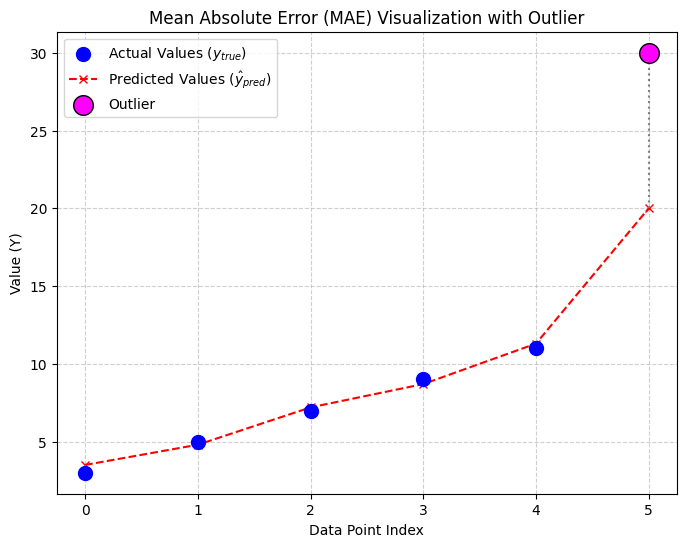

In [7]:
x_axis = np.arange(len(y_true))

plt.figure(figsize=(8, 6))

# 실제값(파란색 점)과 예측값(빨간색 선)을 그래프에 표시
plt.scatter(x_axis, y_true, color='blue', label='Actual Values ($y_{true}$)', s=100, zorder=5)
plt.plot(x_axis, y_pred, color='red', marker='x', linestyle='--', label='Predicted Values ($\hat{y}_{pred}$)')

# 이상치 강조 표시
plt.scatter(x_axis[-1], y_true[-1], color='magenta', s=200, label='Outlier', zorder=10, edgecolors='black')

# 각 데이터 포인트의 오차를 회색 점선으로 표시
for i in range(len(x_axis)):
    plt.vlines(x_axis[i], ymin=y_pred[i], ymax=y_true[i], color='gray', linestyle=':')

plt.title('Mean Absolute Error (MAE) Visualization with Outlier')
plt.xlabel('Data Point Index')
plt.ylabel('Value (Y)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### 고려사항 (Considerations)

* **이상치에 대한 강건함(Robustness)**: MAE의 가장 큰 장점은 이상치에 덜 민감하다는 것임. MSE는 오차를 제곱하기 때문에 큰 오차에 매우 큰 패널티를 부여하지만, MAE는 오차의 크기 그대로 반영하므로 이상치의 영향이 상대적으로 적음.
* **해석의 용이성**: MAE는 실제값과 동일한 단위를 가지므로(예: 가격 예측의 경우 '원'), 모델의 평균 오차를 직관적으로 해석하기 쉬움. (MSE는 '원²')
* **미분 가능성**: MAE는 오차가 0인 지점에서 미분이 불가능함. 이는 경사 하강법(Gradient Descent) 기반의 최적화 알고리즘에서 문제가 될 수 있음. 하지만 실제로는 서브그레이디언트(subgradient)를 사용하거나, 손실이 0에 가까워지면 학습률을 줄이는 등의 방법으로 해결 가능함.

### 최종 요약 (Conclusion)

평균 절대 오차(MAE)는 실제값과 예측값의 차이에 절댓값을 취해 평균을 낸, 직관적이고 해석하기 쉬운 회귀 모델 평가 지표임.

이 노트북에서는 MAE의 계산 과정을 단계별로 구현하고, 이상치가 포함된 데이터에서 MSE와 비교하여 그 특성을 확인함. MAE는 이상치의 영향을 덜 받아 보다 안정적인(robust) 모델을 만들고 싶을 때 우선적으로 고려할 수 있는 손실 함수임.